#### 08_22 00:00:00 시작

# ClickStream 데이터 사용한 분석
사용자들의 인터넷 사용에 대한 데이터

# 인코딩에 대한 문제

In [1]:
# 파이썬3 의 기본 Encoding => UTF-8
#  그러나 윈도우의 경우 ==> EUC-KR, CP949, MS949 ,...

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from IPython.display import Image

In [3]:
path = "./data/Clickstream/"
os.listdir(path)


['clickstream_sample.tab',
 'clickstream_sample.tsv',
 'Data1_Profiles.xlsx',
 'month']

In [4]:
# 디렉토리나 파일 다룰때 os 모듈을 많이 활용함
# 위의 listdir() 도 많이 사용하게 되고

# 다음 os.path.join  도 많이 사용하게 됨


In [5]:
# 동작 예
os.path.join("a", "b", "c", "hello.txt")   # 경로를 문자열로 조립 만들어 준다

'a\\b\\c\\hello.txt'

In [6]:
# 위 listdir 결과중 clickstream_sample.tab 파일의 경로는?
os.path.join(path, "clickstream_sample.tab")

'./data/Clickstream/clickstream_sample.tab'

In [7]:
# tab 파일(혹은 tsv 파일) 은  tab separated value  파일
# tab 으로 구분된 데이터 파일

In [8]:
pd.read_csv(
    os.path.join(path, "clickstream_sample.tsv"),
    delimiter="\t",    # 구분자,     디폴트 값은 --> read_csv (delimiter=",")
)

# 이렇게 하면 UnicodeDecodeError 발생
# UnicodeDecodeError => UTF-8 로 읽으려고 하였으나, 실패!
    
# 기존의 엑셀 파일들은 거의 대부분 이런 식으로 읽어 들이려 하면 에러 발생

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 0: invalid start byte

In [9]:
pd.read_csv(
    os.path.join(path, "clickstream_sample.tsv"),
    delimiter="\t",    # 구분자
    encoding="euc-kr"   # encoding 변경!
).shape  # 확인


(100000, 9)

In [10]:
# Clickstream/month  폴더 안의 내용을 보면

os.listdir(os.path.join(path, "month"))

# 월별 데이터 들 있다.  (월별, 주문, 발주 내역)

['201207.csv',
 '201208.csv',
 '201209.csv',
 '201210.csv',
 '201211.csv',
 '201212.csv',
 '201301.csv',
 '201302.csv',
 '201303.csv',
 '201304.csv',
 '201305.csv',
 '201306.csv']

### TODO
위 csv 파일들을 각각 DataFrame 으로 읽어 들어와 
하나의 DataFrame 으로 합쳐보자

In [11]:
# hint
# list comprehension
# pd.concat

In [12]:
filenames = os.listdir(os.path.join(path, "month"))
dfs = [
    pd.read_csv(os.path.join(path, "month", filename))
    for filename
    in filenames
]
df = pd.concat(dfs)

In [13]:
df.shape   # 10만개이 데이터 x 9컬럼 확인해보자

(100000, 9)

In [14]:
df.head()

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM
0,1,2012070905,search.naver.com,3.0,794.0,네이버 검색,인터넷/컴퓨터,검색,포털검색
1,1,2012072507,plus.google.com,1.0,1.0,구글 Plus,커뮤니티,블로그/SNS,SNS
2,1000,2012072717,sms.nate.com,6.0,15.0,네이트 문자메시지,인터넷/컴퓨터,모바일컨텐츠,포털모바일
3,1001,2012070311,dumoa.com,1.0,60.0,더모아,쇼핑,종합쇼핑,종합쇼핑몰
4,1002,2012070506,media.daum.net,2.0,0.0,미디어다음,뉴스/미디어,인터넷신문,포털뉴스


#### 다시 clickstream_sample.tsv 읽기

In [15]:
df = pd.read_csv(
    os.path.join(path, "clickstream_sample.tsv"),
    delimiter="\t",   
    encoding="euc-kr"
)

df.head()

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM
0,1,2012070905,search.naver.com,3.0,794.0,네이버 검색,인터넷/컴퓨터,검색,포털검색
1,1,2012072507,plus.google.com,1.0,1.0,구글 Plus,커뮤니티,블로그/SNS,SNS
2,1,2012081116,joongang.joinsmsn.com,2.0,5.0,중앙일보,뉴스/미디어,일간지,종합일간지
3,1,2012090304,news.naver.com,5.0,504.0,네이버 뉴스,뉴스/미디어,인터넷신문,포털뉴스
4,1,2012090506,news.nate.com,1.0,0.0,네이트 뉴스,뉴스/미디어,인터넷신문,포털뉴스


In [16]:
# 위 데이터는
# 어떤 유저(CUS_ID ) 가
# 언데 (TIME_ID)
# 어떤 사이트에 (SITE)
# 몇번 접속 (SITE_CNT)
# 얼마나 오래 머물렀고 (ST_TIME)
# 대분류,중분류, 소분류 ...(SITE_NM, BACT_NM, MACT_NM)

#### TODO: proffile 읽어오기
위 유저의 직업군, 나이, 지역 등의 정보 담긴 Data1_Profiles.xlsx 읽기<br>
profile_df 에 담으뒤 CUS_ID 오름차순으로 정렬하기

In [17]:
profile_df = pd.read_excel(
    os.path.join(path, "Data1_Profiles.xlsx")
)
profile_df.sort_values("CUS_ID", inplace=True)
profile_df.head(3)



,CUS_ID,GENDER,AGE,JOB,RESIDENCE
0,1,남자,47,무직/기타,충청
1111,2,여자,27,방송/예술/스포츠,서울
1723,3,여자,26,자영업,경기


In [18]:

# 1. 나이대별 남녀의 수 ( 10대, 20대, 30대, 40대 ... )   <-- 처음에는 이렇게 작업해보고


# 2. 나이대별 남녀의 수 ( 13-17, 18-24, 25-34 )  <-- 실제 광고, 마케팅 업체에선 나이대를 이렇게 구분  (페이스북 사례)



In [19]:
# BACT_NM	MACT_NM	ACT_NM   <-- 이걸로 구글링 해보면
# 경기도기능경기대회 빅데이터 직종  검색됨

## TODO
## 1. 나이대별 남녀의 수 ( 10대, 20대, 30대, 40대 ... ) 

In [20]:
profile_df.AGE.head()

0       47
1111    27
1723    26
1834    30
1945    45
Name: AGE, dtype: int64

In [21]:
# 10대, 20대, 30대 로 변경하기
age_group = profile_df.AGE.apply(
    lambda age: int(age/10) * 10    # 올림, 내림, 버림 등의 연산은 --> math._____ Module 에 많다
)
age_group.head()

0       40
1111    20
1723    20
1834    30
1945    40
Name: AGE, dtype: int64

In [22]:
# 위의 '나이대'별로 groupby 해보자

profile_df.groupby(age_group).size()

AGE
0       1
10     11
20    462
30    959
40    700
50    279
60     59
70     29
dtype: int64

In [23]:
# '나이대' x '성별' 로 groupby 해보자
profile_df.groupby([age_group, profile_df.GENDER]).size()


# 나중에 그래프 까지 같이 그려볼 것이기 때문에 함 완성해보자

AGE  GENDER
0    남자          1
10   남자          5
     여자          6
20   남자        227
     여자        235
30   남자        610
     여자        349
40   남자        475
     여자        225
50   남자        204
     여자         75
60   남자         42
     여자         17
70   남자         22
     여자          7
dtype: int64

In [24]:
# size() 한 다음에 unstack() 하면 DataFrame 이 된다

profile_df.groupby([age_group, profile_df.GENDER]).size().unstack()

GENDER,남자,여자
AGE,,
0,1.0,NaN
10,5.0,6.0
20,227.0,235.0
30,610.0,349.0
40,475.0,225.0
50,204.0,75.0
60,42.0,17.0
70,22.0,7.0


In [25]:
# 나중에 pivot table 이나, cross table 을 만들어도 쉽게 작업 할수 있다

In [26]:
# NaN 은 0 으로 채우기
age_gender_df = profile_df\
    .groupby([age_group, profile_df.GENDER])\
    .size()\
    .unstack()\
    .fillna(0)
    
age_gender_df

GENDER,남자,여자
AGE,,
0,1.0,0.0
10,5.0,6.0
20,227.0,235.0
30,610.0,349.0
40,475.0,225.0
50,204.0,75.0
60,42.0,17.0
70,22.0,7.0


In [27]:
# 만약에 나이대(AGE) 가 아닌 성별(GDNDER) 기준으로 보고 싶은 경우는?

# T 사용

profile_df\
    .groupby([age_group, profile_df.GENDER])\
    .size()\
    .unstack()\
    .fillna(0).T

AGE,0,10,20,30,40,50,60,70
GENDER,,,,,,,,
남자,1.0,5.0,227.0,610.0,475.0,204.0,42.0,22.0
여자,0.0,6.0,235.0,349.0,225.0,75.0,17.0,7.0


## TODO : 위의 age_gender_df 의 그래프를 그리기

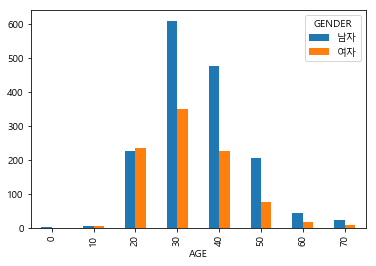

In [28]:
# 기본적인 그래프

age_gender_df.plot(kind="bar")

# index 가 나이이기 때문에 나이를 기준ㅇ로 만들어 진다

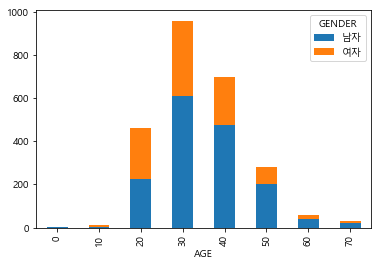

In [29]:
# 함치기 : stacked 옵션

age_gender_df.plot(kind="bar", stacked=True)

Text(0.5,1,'웹사이트 사용자 남녀의 수')

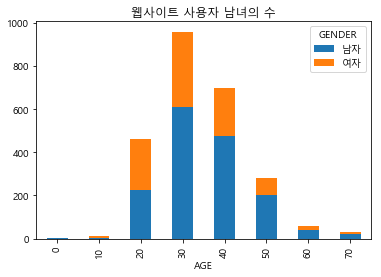

In [30]:
ax = age_gender_df.plot(kind="bar", stacked=True)
ax.set_title("웹사이트 사용자 남녀의 수")


## 비율 정보
#### DataFrame 의 div()  <-- 나누기

In [31]:
age_gender_df

GENDER,남자,여자
AGE,,
0,1.0,0.0
10,5.0,6.0
20,227.0,235.0
30,610.0,349.0
40,475.0,225.0
50,204.0,75.0
60,42.0,17.0
70,22.0,7.0


In [32]:
age_gender_df.sum()

GENDER
남자    1586.0
여자     914.0
dtype: float64

In [33]:
age_gender_df.sum(axis=0)   # 컬럼별 합계

GENDER
남자    1586.0
여자     914.0
dtype: float64

In [34]:
age_gender_df.sum(axis=1)   # 인덱스별 합계

AGE
0       1.0
10     11.0
20    462.0
30    959.0
40    700.0
50    279.0
60     59.0
70     29.0
dtype: float64

In [35]:
age_gender_df.div(age_gender_df.sum(axis=0), axis=1)

GENDER,남자,여자
AGE,,
0,0.000631,0.000000
10,0.003153,0.006565
20,0.143127,0.257112
30,0.384615,0.381838
40,0.299496,0.246171
50,0.128625,0.082057
60,0.026482,0.018600
70,0.013871,0.007659


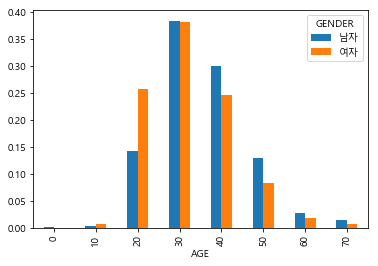

In [36]:
# 위 데이터로 그래프 그리면,   % 비율 데이터로 나온다
age_gender_df.div(age_gender_df.sum(axis=0), axis=1).plot(kind="bar")

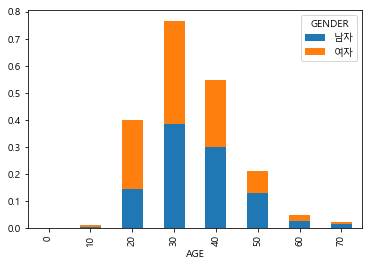

In [37]:
age_gender_df.div(age_gender_df.sum(axis=0), axis=1).plot(kind="bar", stacked=True)

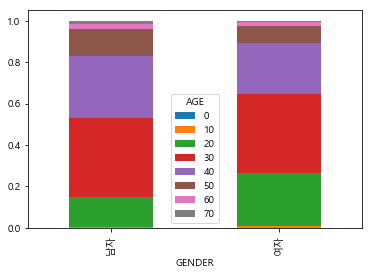

In [38]:
age_gender_df.div(age_gender_df.sum(axis=0), axis=1).T.plot(kind="bar", stacked=True)    # 성별로 기준이바뀐 그래프

#### 08_22 00:20:40

## 2. 나이대별 남녀의 수 ( 13-17, 18-24, 25-34) 

In [39]:
# 물론 다음과 같은 함수 만들수도 있겠죠...
# def get_age_group(age):
#     if age < 13:
#         pass
#     elif age ...:
#         ...

# 그러나, 좀더 쉬운 방법으로!
# 기준점을 나누는 겁니다.

bins = [0, 13, 18, 25, 35, 45, 55, 65]


#### pd.cut () 함수

In [44]:
age_group = pd.cut(
    profile_df.AGE,
    bins
)

age_group   # 결과는 Series,  각 value 는 Interval 객체
age_group.head()
# 위 범주에 없는면 NaN 으로 표시됨

# (0, 13]    0.0 <    <= 13.0

0       (45, 55]
1111    (25, 35]
1723    (25, 35]
1834    (25, 35]
1945    (35, 45]
Name: AGE, dtype: category
Categories (7, interval[int64]): [(0, 13] < (13, 18] < (18, 25] < (25, 35] < (35, 45] < (45, 55] < (55, 65]]

In [43]:
# 위 결과로 groupby 하면!
profile_df.groupby(age_group).size()

AGE
(0, 13]       2
(13, 18]      8
(18, 25]    146
(25, 35]    881
(35, 45]    913
(45, 55]    398
(55, 65]    108
dtype: int64

### 도전 

In [45]:
# 1. df + profile_df | merge   일단은 합해야 한다   사용자별로  클릭데이터 와 개인정보가 한번에 보이게..
# 2.  유저별로 
#        페이지뷰수, 체류시간, 총 접속 일수, 방문한 사이트 수   <-- 이 4가지를 구해보자
#          ----------------------------------------
#         SITE_CNT  ST_TIME  TIME_ID    SITE_NM


#### 08_22 00:29:40
해보겠습니다

In [46]:
pd.merge(df, profile_df, on="CUS_ID")
# merge() 에 사용할수 있는 옵션들 --> left_on, right_on, left_index, right_index, on


# concat() 안 안되요.
# 위, 아래,  혹은 index 기준으로 좌우 로 붙기 때문에..

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,GENDER,AGE,JOB,RESIDENCE
0,1,2012070905,search.naver.com,3.0,794.0,네이버 검색,인터넷/컴퓨터,검색,포털검색,남자,47,무직/기타,충청
1,1,2012072507,plus.google.com,1.0,1.0,구글 Plus,커뮤니티,블로그/SNS,SNS,남자,47,무직/기타,충청
2,1,2012081116,joongang.joinsmsn.com,2.0,5.0,중앙일보,뉴스/미디어,일간지,종합일간지,남자,47,무직/기타,충청
3,1,2012090304,news.naver.com,5.0,504.0,네이버 뉴스,뉴스/미디어,인터넷신문,포털뉴스,남자,47,무직/기타,충청
4,1,2012090506,news.nate.com,1.0,0.0,네이트 뉴스,뉴스/미디어,인터넷신문,포털뉴스,남자,47,무직/기타,충청
5,1,2012091004,plus.google.com,2.0,66.0,구글 Plus,커뮤니티,블로그/SNS,SNS,남자,47,무직/기타,충청
6,1,2012092017,plus.google.com,2.0,23.0,구글 Plus,커뮤니티,블로그/SNS,SNS,남자,47,무직/기타,충청
7,1,2012122801,news.naver.com,3.0,213.0,네이버 뉴스,뉴스/미디어,인터넷신문,포털뉴스,남자,47,무직/기타,충청
8,1,2012123114,search.naver.com,1.0,0.0,네이버 검색,인터넷/컴퓨터,검색,포털검색,남자,47,무직/기타,충청
9,1,2013061008,blog.naver.com,1.0,46.0,네이버 블로그,커뮤니티,블로그/SNS,포털블로그,남자,47,무직/기타,충청


In [49]:
# groupby + agg 로 하나씩 작성해 보자

result_df= df.groupby("CUS_ID").agg({
    "SITE_CNT": {"총 페이지뷰": "sum"},
    "ST_TIME": {"총 체류시간": "sum"}
})

result_df.head()

c:\users\frogt\appdata\local\programs\python\python36\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,SITE_CNT,ST_TIME
,총 페이지뷰,총 체류시간
CUS_ID,,
1,117.0,3463.0
2,371.0,8990.0
3,110.0,3994.0
4,67.0,2515.0
5,89.0,3863.0


#### 총접속일수?  어떻게?

In [52]:
# time id 값 고찰하기

df.TIME_ID.head()

# 20120709xxx 가 10변 나와도 접속일수는 1번으로 카운트 해야 하고
# 20120709xxx 가 0변 나오면 접속일수는 0번으로 카운트 해야 한다

# 이러한 처리를 위해 함수가 필요..   연월일  까지만 뽑아내야 하는 함수

0    2012070905
1    2012072507
2    2012081116
3    2012090304
4    2012090506
Name: TIME_ID, dtype: int64

In [61]:
# 가령 다음과 같은 함수
date = df.TIME_ID.apply(lambda x: int(str(x)[:8]))



# 나중에 df 에 추가 하려면 이렇게 가능--> df["date"] = date
df["date"] = date

date.head()

0    20120709
1    20120725
2    20120811
3    20120903
4    20120905
Name: TIME_ID, dtype: int64

In [62]:
result_df= df.groupby("CUS_ID").agg({
    "SITE_CNT": {"총 페이지뷰": "sum"},
    "ST_TIME": {"총 체류시간": "sum"},
    "date": {
        "총 접속 일수": lambda x: x.unique().size
        # x => 특정 유저의 TIME_ID 에 대한 Series
    }

})

result_df.head()

c:\users\frogt\appdata\local\programs\python\python36\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,SITE_CNT,ST_TIME,date
,총 페이지뷰,총 체류시간,총 접속 일수
CUS_ID,,,
1,117.0,3463.0,42
2,371.0,8990.0,46
3,110.0,3994.0,22
4,67.0,2515.0,16
5,89.0,3863.0,37


#### 08_22 00:36:52

#### 위의 date 를 거치지 않고 바로 만드려면?

In [ ]:
#     "date": {
#         "총 접속 일수": lambda x: x.unique().size
#         # x => 특정 유저의 TIME_ID 에 대한 Series
#     }

#     ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

#     "TIME_ID": {
#         "총 접속 일수": lambda y: y.apply(lambda x: int(str(x)[:8])).unique().size,
#         # x => TIME_ID Series
#         # "y.apply(lambda x: int(str(x)[:8]))" => date Series
#     },



In [63]:
result_df = df.groupby("CUS_ID").agg({
    "SITE_CNT": {"총 페이지뷰": "sum"},
    "ST_TIME": {"총 체류시간": "sum"},
    "TIME_ID": {
        "총 접속 일수": lambda y: y.apply(lambda x: int(str(x)[:8])).unique().size,
        # x => TIME_ID Series
        # "y.apply(lambda x: int(str(x)[:8]))" => date Series
    },
    "SITE_NM": {"방문한 사이트 수": lambda x: x.unique().size}
})

result_df.head()

c:\users\frogt\appdata\local\programs\python\python36\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,SITE_CNT,ST_TIME,TIME_ID,SITE_NM
,총 페이지뷰,총 체류시간,총 접속 일수,방문한 사이트 수
CUS_ID,,,,
1,117.0,3463.0,42,23
2,371.0,8990.0,46,28
3,110.0,3994.0,22,12
4,67.0,2515.0,16,11
5,89.0,3863.0,37,22


### 최종적으로 합치기

In [64]:
pd.merge(
    result_df,
    profile_df,
    left_index=True,
    right_on="CUS_ID"
)

c:\users\frogt\appdata\local\programs\python\python36\lib\site-packages\pandas\core\reshape\merge.py:558: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(SITE_CNT, 총 페이지뷰)","(ST_TIME, 총 체류시간)","(TIME_ID, 총 접속 일수)","(SITE_NM, 방문한 사이트 수)",CUS_ID,GENDER,AGE,JOB,RESIDENCE
0,117.0,3463.0,42,23,1,남자,47,무직/기타,충청
1111,371.0,8990.0,46,28,2,여자,27,방송/예술/스포츠,서울
1723,110.0,3994.0,22,12,3,여자,26,자영업,경기
1834,67.0,2515.0,16,11,4,남자,30,서비스,광주
1945,89.0,3863.0,37,22,5,남자,45,사무관리직,경기
2056,6.0,539.0,3,2,6,남자,48,사무관리직,경상
2167,459.0,13591.0,28,10,7,여자,41,자영업,부산
2278,45.0,364.0,9,9,8,남자,33,영업/마케팅,인천
2389,300.0,5459.0,44,35,9,남자,47,자영업,울산
1,523.0,16608.0,53,20,10,남자,36,영업/마케팅,서울


#### 08_22 종료